# 國立台北科技大學 111學年度第2學期 多媒體技術與應用 期中考試



## Q1. (10%)<br>
$$
A
= \begin{bmatrix}  1&2&2\\ 0&1&2\\ \end{bmatrix},
B
= \begin{bmatrix}  1&2\\ 2&2\\ 2&1 \end{bmatrix},
C
= \begin{bmatrix}  1\\ 2\\ 3 \end{bmatrix}
$$
求<br> (手解)
(a) $AB$ <br>
(b) $BA$ <br>
(c) $CC^T$ <br>


<font size=3 color='red'>
Q1解: (手寫在試卷上)<br>

## Q2 (20%)
利用下面三個資料找方程式$y = a + bx$ 的 $a$ 和 $b$ 
1. 最小平方法 - 寫出一般化的方程式 (10%)


2. 寫程式print 出 $y = a + bx$ 的 $a$ 和 $b$  (10%)

|x|y|
|:-|:-|
|-1|-3|
|0|1|
|2|4|

翻作業找HINT吧

<font size=3 color='red'>
Q2.1解: (手寫在試卷上)<br>


In [2]:
#Q2.2
import numpy as np

def beta_closed_form_sol(x, y):
  beta = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(x), x)), np.transpose(x)), y)
  return beta

dep = [-3.0, 1.0, 4.0] # dependent
ind = [[1.0, -1.0], [1.0, 0.0], [1.0, 2.0]] # independent

np_dep = np.array(dep)
np_ind = np.array(ind)
print(beta_closed_form_sol(np_ind, np_dep))

[-0.07142857  2.21428571]


## Q3. (10%)<br>
<font size=3>
假設

$f(x)=x_1^2+x_2^2+2x_1-3x_2+200$
<br>
$$
x^* = \min_x{f(x)}
$$
    
請求$x^*$

<font size=4 color='red'>
Q3解: (手寫在試卷上)<br>


## Q4. (25%)
<font size=3>
假設

$f(x)=x_1^4+x_2^4+2x_1^2-3x_2^2+5x_1+6x_2+10$<br>
請求$x^*$
$$
x^* = \min_x{f(x)}
$$
1 寫出梯度方程式 (手解) (10%)<br>
    
2 寫出梯度下降法的PYTHON程式: (10%)<br>
    利用梯度下降法 ，當初始值為 
   $ \begin{bmatrix}  x_1\\ x_2\\ \end{bmatrix} = \begin{bmatrix}  0\\ 0\\ \end{bmatrix}$<br>
    學習率為 0.01求解，更新次數50次。<br>
    找到$x^*$ 和算出$f(x^*)$

<font size=4 color='red'>
Q4.1 解: (手寫在試卷上)<br>


x_star=[-0.77400297 -1.56741389]
f(x_star)=-3.0519994037746283


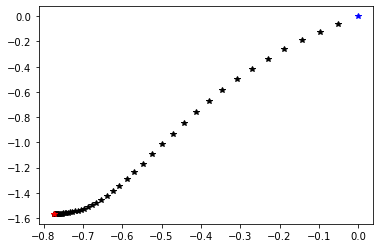

In [5]:
# Q4.2
import numpy as np
import matplotlib.pyplot as plt

def f(x1, x2):
    return x1 ** 4 + x2 ** 4 + 2 * x1 ** 2 - 3 * x2 ** 2 + 5 * x1 + 6 * x2 + 10

def g(x1, x2):
    return np.array([4 * x1 ** 3 + 4 * x1 + 5, 4 * x2 ** 3 - 6 * x2 + 6])

if __name__ == '__main__':
    x_hat = np.array([0, 0]) # x1, x2
    plt.plot(x_hat[0], x_hat[1], 'b*')
    learn = 0.01
    update_times = 50
    for i in range(update_times):
        x_hat = x_hat - learn * g(x_hat[0], x_hat[1])
        plt.plot(x_hat[0], x_hat[1], 'k*')

    plt.plot(x_hat[0], x_hat[1], 'r*')
    print('x_star={}'.format(x_hat))
    print('f(x_star)={}'.format(f(x_hat[0], x_hat[1])))

## Q5. (10%)
<font size=3>
我們現在有四個bin檔案分別為<br>
- data_train_iris.bin : 每個數字都是Double (8bytes)<br>
- label_train_iris.bin : 每個數字都是Long (4bytes)<br>
- data_test_iris.bin : 每個數字都是Double (8bytes)<br>
- label_test_iris.bin : 每個數字都是Long (4bytes)<br>
    
    
1. 將bin轉成float數或是整數(long)<br>
    
- data_train_iris為訓練資料data(請命名為X_train): 解出來大小應該是75x4 <br>
- label_train_iris為訓練資料label(請命名為Y_train): 解出來大小應該是75x1 <br>
- data_test_iris為測試資料data(請命名為X_test): 解出來大小應該是75x4 <br>
- label_test_iris為測試資料label(請命名為Y_test): 解出來大小應該是75x1 <br>

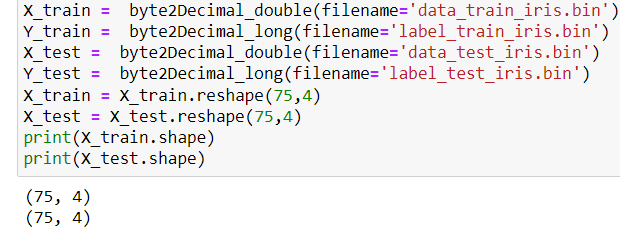
>Hint: 利用```import struct```來轉binary file，[decode mode](https://docs.python.org/zh-cn/3/library/struct.html) <br>
>Hint1: Double解碼語法: struct.unpack('d', data[0:8]) <br>
>Hint2: Long解碼語法: struct.unpack('l', data[0:4]) <br>

In [24]:
#Q5
import struct

def byte2Decimal_double(filename):
    with open(filename, "rb") as f:
        data = f.read()
        temp  = []
        i = 0
        while i < len(data):
            (tmp, ) = struct.unpack('d', data[i:i+8])
            temp.append(tmp)
            i += 8
        return np.array(temp)

def byte2Decimal_long(filename):
    with open(filename, "rb") as f:
        data = f.read()
        temp  = []
        i = 0
        while i < len(data):
            (tmp, ) = struct.unpack('l', data[i:i+4])
            temp.append(tmp)
            i += 4
        return np.array(temp)

# 讀取train和test資料
X_train = byte2Decimal_double("data_train_iris.bin")
Y_train = byte2Decimal_long("label_train_iris.bin")
X_test = byte2Decimal_double("data_test_iris.bin")
Y_test = byte2Decimal_long("label_test_iris.bin")
X_train = X_train.reshape(75, 4)
X_test = X_test.reshape(75, 4)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(75, 4)
(75, 4)
(75, 1)
(75, 1)


## Q6.  (5%)
<font size=3>
    將Q5解出來的數值進行訓練利用 sklearn的QDA 進行模型訓練<br>
(QDA訓練X_train，然後評估X_test的正確率(Accuracy))

In [25]:
#Q6
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_QDA = QuadraticDiscriminantAnalysis()
clf_QDA.fit(X_train, Y_train)
result = clf_QDA.predict(X_test)
# print('QDA : data:{}, predict:{}'.format(X_test, result))
true_predict = 0
# print(Y_train)
for i in range(len(Y_test)):
    if (result[i] == Y_test[i]):
        true_predict += 1
accuracy = true_predict / len(Y_test)
print(accuracy)

1.0


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Q7. (20%)
<font size=3>
將Q5解出來的數值利用Python(只能用numpy模組)<br> 
寫一個簡單的羅吉斯回歸(logistic regression)分類(訓練X_train，然後評估X_test的正確率(Accuracy))<br>
我們只類別0和類別1，類別2忽略。(見下範例程式)
    
logistic regression: <br> 
$$
L(\beta) = \sum_{i=1}^n \left( log(1+e^{x_i^T \beta}) -y_i x_i^T\beta    \right)
$$
    
$$
\frac{\partial L(\beta)}{\partial \beta}   
 = \sum_{i=1}^n \left( p_i-y_i\right) x_i = \sum_{i=1}^n  \left( \frac{e^{x_i^T \beta}}{1+e^{x_i^T \beta}} - y_i   \right) x_i
$$
    
```
pos = np.where(Y_train!=2)[0]
X_train_ = X_train[pos,:]
Y_train_ = Y_train[pos,:]
pos = np.where(Y_test!=2)[0]
X_test_ = X_test[pos,:]
Y_test_ = Y_test[pos,:]    
```
    
梯度下降法求解 $\beta$，在程式中print($\beta$)，並且算測試資料(X_test_)正確率(Accuracy)。<br>
1. 初始值都從0開始<br>
2. 學習率0.001<br>
3. 學習次數400次<br>

In [21]:
#Q7
def Sigmoid(func):
    if func >= 0:
        return 1 / (1 + np.exp(-func))
    else:
        return np.exp(func) / (1 + np.exp(func))

def Get_logLoss(X, Y, B):
    loss = 0
    
    for i in range(len(X)):
        bTx = np.matmul(np.transpose(B), X[i])
        pi = Sigmoid(bTx)
        if (1 - pi != 0): # pi if very close to 1(e.g. 0.99...999), Sigmoid will return 1
            # also can use loss += -(Y[i] * np.log(pi) + (1 - Y[i]) * np.log(1 - pi))
            loss -= (Y[i] * np.log(pi / (1 - pi)) + np.log(1 - pi))
        else: # if pi == 1, that mean this(Y[i] * np.log(pi / (1 - pi)) + np.log(1 - pi)) will be 0(min loss)
            loss -= 0
        # if use sum(log(1 + np.exp(bTx)) - yi * bTx))
        # instead of -sum(yi * log(pi / (1 - pi)) + log(1 - pi)), -sum(yi * log(pi) + (1 - yi) * log(1 - pi))
        # will encounter overflow (np.exp overflow)
        
    return loss

def Logistic_regression(B, alpha, times, store, acc, X, Y):
    # B = [b0(constant), b1(h), b2(w)]
    # add constant
    # X = [x0(constant), x1(h), x2(w)]
    tmp = [1.0 for i in range(len(X))]
    X = np.insert(X, 0, tmp, 1)
    
    for t in range(times):
        for i in range(len(X)):
            gradient_descent = 0
            bTx = np.matmul(np.transpose(B), X[i])
            pi = Sigmoid(bTx)
            gradient_descent += ((pi - Y[i]) * X[i])
            B = B - alpha * gradient_descent
        
        true_predict = []
        for i in range(len(X)):
            bTx = np.matmul(np.transpose(B), X[i])
            pi = Sigmoid(bTx)
            if (pi >= 0.5 and Y[i] == 1) or (pi < 0.5 and Y[i] == 0):
                true_predict.append(1)
        # Get_log_loss is sum of log_loss(n data), so we need to divide n
        # to get the log_loss of every data (mean)
        loss = Get_logLoss(X, Y, B) / len(X)
        store.append(loss)
        acc.append(len(true_predict) / len(Y))
        # print(len(true_predict), len(Y))
    return store, B, acc

def gogo(init, learn, times, X, Y):
    store = [] # store loss
    accuracy = []
    init_beta = np.array([init, init, init])
    store, beta, accuracy = Logistic_regression(init_beta, learn, times, store, accuracy, X, Y)
    print("beta =", beta)
    print("accuracy =", accuracy[len(accuracy) - 1])
    plt.title("log loss")
    plt.plot(list(range(times)), store)
    plt.show()
    plt.title("accuracy")
    plt.plot(list(range(times)), accuracy)
    plt.show()
    return beta

pos = np.where(Y_train != 2)[0]
X_train_ = X_train[pos,:]
Y_train_ = Y_train[pos,:]
pos = np.where(Y_test != 2)[0]
X_test_ = X_test[pos,:]
Y_test_ = Y_test[pos,:]
beta = gogo(0.0, 0.001, 400, X_train_, Y_train_)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed